# Basic Statistics

In [0]:
# Import key libraries
library(quantmod)
library(ggplot2)

# Import library to resize plots for fit
library(repr)
options(repr.plot.width=5, repr.plot.height=4)

# Get data of JPMorgan using API directly, to save as variable JPM
getSymbols("JPM",
           from = "2018-02-01", 
           to = "2018-12-30", 
           src = "yahoo",
          auto.assign = TRUE)

Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'repr' was built under R version 3.6.3"'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per 

[1] "JPM"

In [0]:
# Extract JPM Adjusted Closed Prices only
JPM <- JPM[,"JPM.Adjusted"]

# Show JPM to ensure right data is extracted
head(JPM)

           JPM.Adjusted
2018-02-01     110.6600
2018-02-02     108.2076
2018-02-05     103.0188
2018-02-06     106.1529
2018-02-07     106.8725
2018-02-08     102.1477

## Stock Mean Value and Price Development

In [0]:
# Calculate the mean stock value of JPMorgan in the stipulated period
mean <- mean(JPM)
print(paste0('Average stock value:', mean))

[1] "Average stock value:105.67118490393"


Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.


ERROR: Error: Cannot use `+.gg()` with a single argument. Did you accidentally put + on a new line?


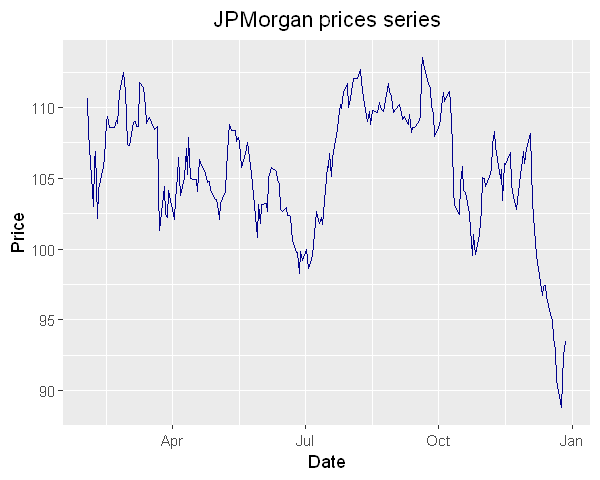

In [0]:
# Plot line chart to show price development of JPMorgan
ggplot(JPM, aes(x = index(JPM), y = JPM[,1])) + geom_line(color = "darkblue") + 
ggtitle("JPMorgan prices series") + 
xlab("Date") + ylab("Price") + theme(plot.title = element_text(hjust = 0.5)) 
+ scale_x_date(date_labels = "%b %y", date_breaks = "6 months")

# Calculate stock returns

In [0]:
# Proceed to calculate absolute value of return and returns in percentage
JPM_prices <- sapply(JPM, as.numeric) # transform data to numeric for math operation

# Denote n the number of time periods:
n <- nrow(JPM_prices) 

JPM_abs_diff <- (JPM_prices[2:n, 1] - JPM_prices[1:(n - 1), 1]) # get absolute return
JPM_ret <- (JPM_abs_diff/JPM_prices[1:(n - 1), 1]) # get percentage return using P_t/P_{t-1} - 1
JPM_log_ret <- log(JPM_prices[2:n, 1]) - log(JPM_prices[1:(n - 1), 1]) # get percentage return using log return formula

JPM_returns <- cbind(JPM_abs_diff,JPM_ret, JPM_log_ret) # concat all returns into one matrix
JPM_returns <- rbind(cbind(NA, NA, NA), JPM_returns) # add a row of NA values to indicate t = 0
JPM <- cbind(JPM_prices, JPM_returns) # combined price data and return data
head(JPM) # preview output

JPM.Adjusted,JPM_abs_diff,JPM_ret,JPM_log_ret
110.6600,NA,NA,NA
108.2076,-2.452385,-0.022161441,-0.022410695
103.0188,-5.188820,-0.047952449,-0.049140297
106.1529,3.134133,0.030422925,0.029969325
106.8725,0.719612,0.006779013,0.006756138
102.1477,-4.724869,-0.044210320,-0.045217390


## Calculate stock return volatility

$ daily\_volatility = stdev(daily\_returns)$<br>
$ annualized\_volatility = daily\_volatility \times \sqrt{252} $

Assume 1 year has 252 trading days

In [0]:
# First calculate 
daily_vol <- sd(JPM[2:n,"JPM_log_ret"]) * 100
annualized_vol <- daily_vol* sqrt(252)

print(paste('Daily stock volatility (%):', round(daily_vol,digits = 2)))
print(paste('Annualized stock volatility(%):', round(annualized_vol,digits = 2)))

[1] "Daily stock volatility (%): 1.44"
[1] "Annualized stock volatility(%): 22.89"


|Statistics| Value| 
|-----|-------| 
|Average Stock Value| 105.67|
|Stock return volatility (daily)| 1.44%|
|Stock return volatility (annualized)| 22.89%|


# Linear Regression

In [0]:
# Extract S&P500 price data from yahoo API
getSymbols("^GSPC",
           from = "2018-02-01", 
           to = "2018-12-30", 
           src = "yahoo",
          auto.assign = TRUE)

# Extract only adjusted close prices
GSPC <- GSPC[,"GSPC.Adjusted"]
head(GSPC)

[1] "^GSPC"

           GSPC.Adjusted
2018-02-01       2821.98
2018-02-02       2762.13
2018-02-05       2648.94
2018-02-06       2695.14
2018-02-07       2681.66
2018-02-08       2581.00

In [0]:
# Combined S&P500 and JPM adjusted closed prices into one matrix
my_data <- cbind(GSPC, JPM_prices)
head(my_data)

           GSPC.Adjusted JPM.Adjusted
2018-02-01       2821.98     110.6600
2018-02-02       2762.13     108.2076
2018-02-05       2648.94     103.0188
2018-02-06       2695.14     106.1529
2018-02-07       2681.66     106.8725
2018-02-08       2581.00     102.1477

[1] 0.8068949

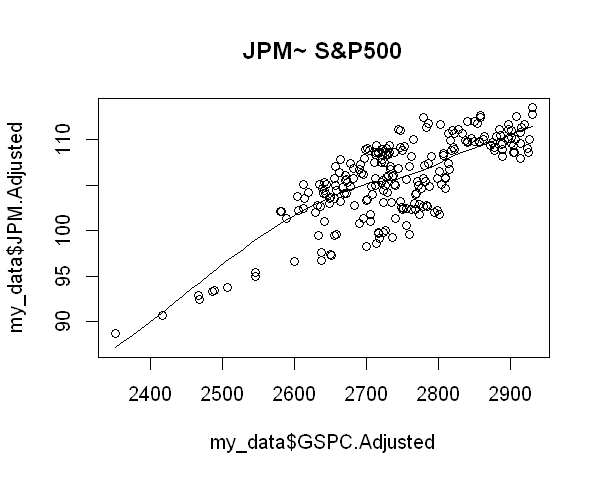

In [0]:
# Show scatter plot
scatter.smooth(x=my_data$GSPC.Adjusted, y=my_data$JPM.Adjusted, main="JPM~ S&P500")  # scatterplot
cor(cars$speed, cars$dist) 

In [0]:
# apply regression analysis
linearMod <- lm(JPM.Adjusted ~ GSPC.Adjusted, data=my_data) 
print(linearMod)


Call:
lm(formula = JPM.Adjusted ~ GSPC.Adjusted, data = my_data)

Coefficients:
  (Intercept)  GSPC.Adjusted  
     13.55492        0.03358  



In [0]:
summary(linearMod)


Call:
lm(formula = JPM.Adjusted ~ GSPC.Adjusted, data = my_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6587 -2.3631  0.4766  2.3498  5.5676 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   13.554920   5.219148   2.597     0.01 *  
GSPC.Adjusted  0.033579   0.001901  17.662   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.928 on 227 degrees of freedom
Multiple R-squared:  0.5788,	Adjusted R-squared:  0.5769 
F-statistic: 311.9 on 1 and 227 DF,  p-value: < 2.2e-16


# Univariate Time Series Analysis and Forecasting

In [0]:
# Import key libraries
library(tidyverse)
library(stats)
library(readxl)
library(tseries)
library(forecast)

#load data
Index <- read_excel("C:/Users/clee0/Documents/WQU Assigment 1/CSUSHPISA.xlsx", 
                        sheet = "CSUSHPISA",
                        col_names = c('Date','CSUSHPISA'),
                        col_types = c("date", "numeric"), skip = 1)


Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.3     
Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::first()  masks xts::first()
x dplyr::lag()    masks stats::lag()
x dplyr::last()   masks xts::last()
Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message:
"package 'forecast' was built under R version 3.6.3"

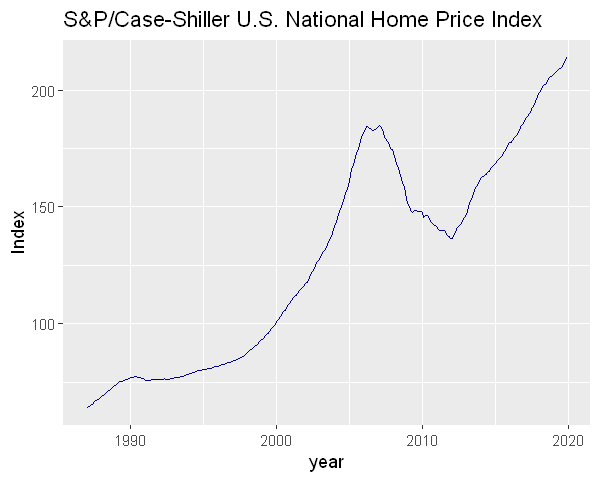

In [0]:
#plot data
ggplot(data = Index, aes(x=Date,y=CSUSHPISA))+
geom_line(color ="darkblue") + 
labs(title='S&P/Case-Shiller U.S. National Home Price Index',x="year",y="Index")

In [0]:
# Convert the data frame to a time series object 
index <- ts(Index$CSUSHPISA,start = 1987, frequency=12)

In [0]:
# ADF test
adf.test(index)


	Augmented Dickey-Fuller Test

data:  index
Dickey-Fuller = -3.1079, Lag order = 7, p-value = 0.1093
alternative hypothesis: stationary


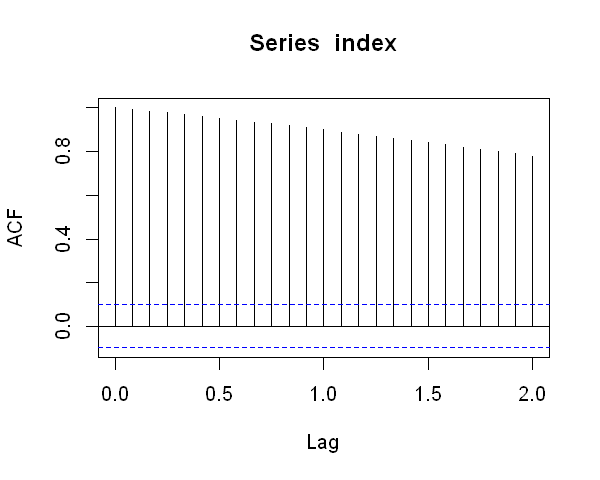

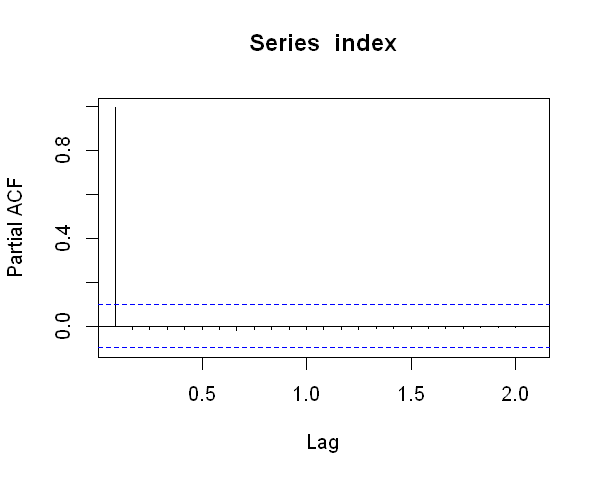

In [0]:
# plot ACF lag=24
acf(index,24)
pacf(index)

The ACF of the index variable is typical of a non-stationary process: auto-correlations are very close to 1 and slowly fade.        

To remove non-stationarity, apply difference to the series as below.


	Augmented Dickey-Fuller Test

data:  index_diff_1
Dickey-Fuller = -2.3366, Lag order = 7, p-value = 0.4351
alternative hypothesis: stationary


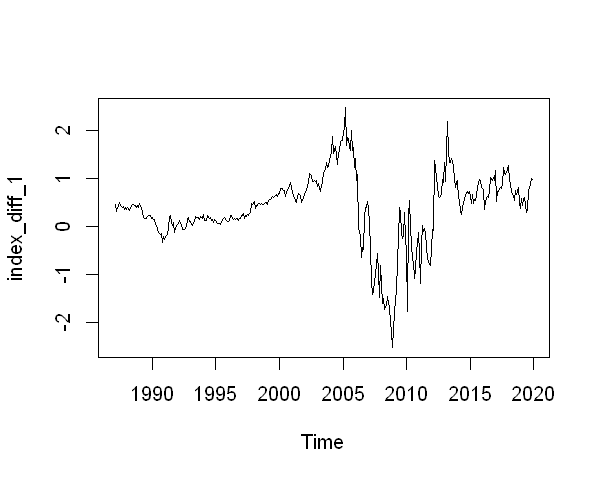

In [0]:
# differencing and ADF test

# when d = 1
index_diff_1 <- diff(index,differences = 1)
plot(index_diff_1)
adf.test(index_diff_1)

Warning message in adf.test(index_diff_2):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  index_diff_2
Dickey-Fuller = -9.2773, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


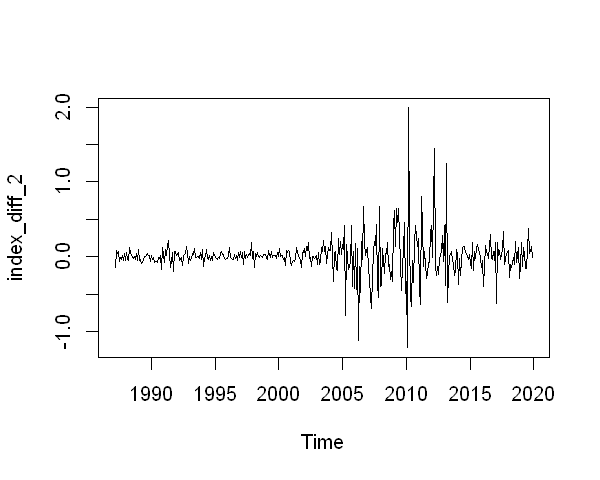

In [0]:
# when d = 2
index_diff_2 <- diff(index,differences = 2)
plot(index_diff_2)
adf.test(index_diff_2)


Warning message in adf.test(index_diff_3):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  index_diff_3
Dickey-Fuller = -13.315, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


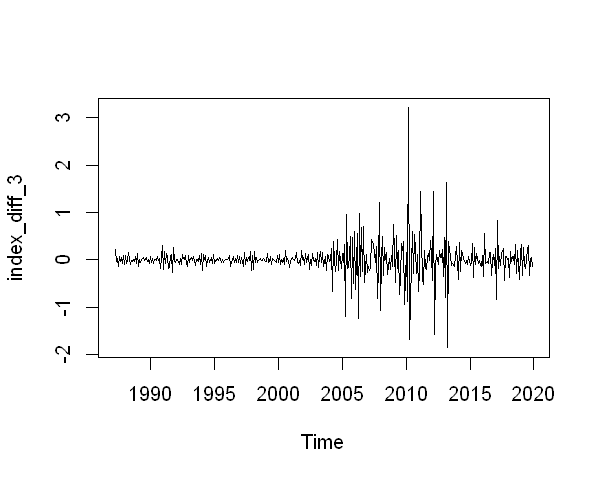

In [0]:
# when d = 3
index_diff_3 <- diff(index,differences = 3)
plot(index_diff_3)
adf.test(index_diff_3)

Interpretation:   

when d=1, the ADF test of the index series cannot reject the hypothesis of a unit root at a 1% level of significance.  

when d=2 and d=3, p-values are both less tha 0.01, the ADF test of the index series can reject the hypothesis of a unit root at a 1% level of significance.      

From these results we can choose d=2 or d=3.

## Implement an ARIMA(p,d,q) model

### decide d 

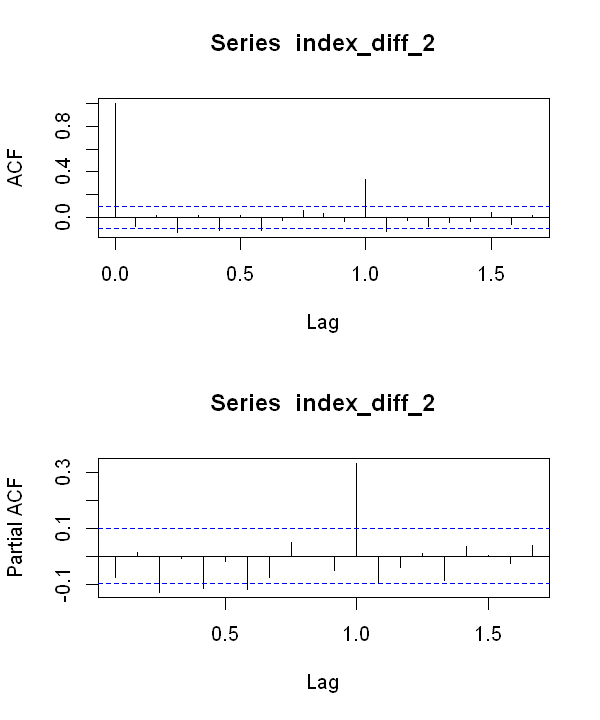

In [0]:
# get ACF and PACF for ARIMA model, d = 2
options(repr.plot.width=5, repr.plot.height=6)
par(mfrow=c(2,1))
acf(index_diff_2,lag.max=20)
pacf(index_diff_2,lag.max=20)

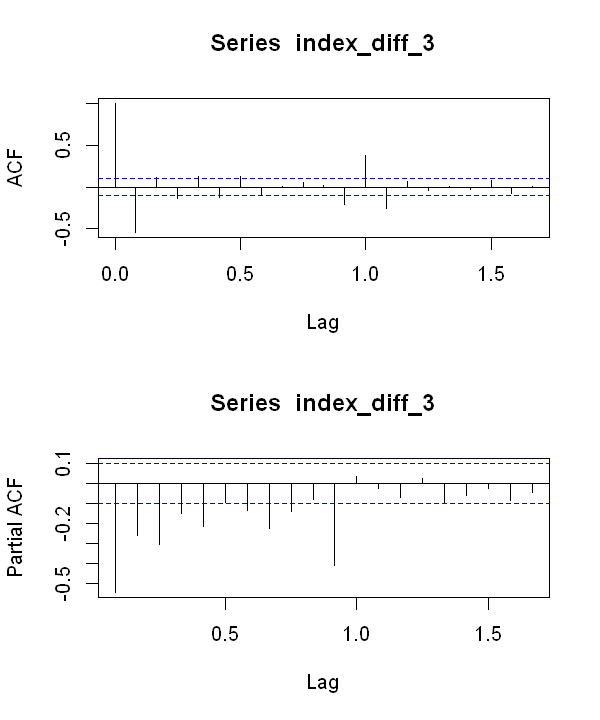

In [0]:
# get ACF and PACF for ARIMA model, d = 3
par(mfrow=c(2,1))
acf(index_diff_3,lag.max=20)
pacf(index_diff_3,lag.max=20)

By analysing the ACF and PACF for both cases, we find that index_diff_2 performs better, so we decide d=2.

### decide p, q

In [0]:
# first have a look of auto function
auto.arima(index)

Series: index 
ARIMA(3,1,2)(0,0,2)[12] with drift 

Coefficients:
          ar1     ar2     ar3     ma1     ma2    sma1    sma2   drift
      -0.4958  0.5764  0.6600  1.4517  0.8223  0.3141  0.1229  0.4055
s.e.   0.1598  0.0812  0.1079  0.1274  0.0791  0.0542  0.0465  0.2033

sigma^2 estimated as 0.05462:  log likelihood=15.88
AIC=-13.75   AICc=-13.29   BIC=22.06

Which suggest q=2, and we already found d=2, so we can check with different combination to find the lowest AIC.

In [0]:
# p, d, q = 1, 2, 2
am122<-arima(index,order=c(1,2,2))
am122


Call:
arima(x = index, order = c(1, 2, 2))

Coefficients:
          ar1     ma1      ma2
      -0.9932  0.9497  -0.0236
s.e.   0.0081  0.0536   0.0531

sigma^2 estimated as 0.06219:  log likelihood = -12.09,  aic = 32.19

In [0]:
# p, d, q = 2, 2, 1
am221<-arima(index,order=c(2,2,1))
am221


Call:
arima(x = index, order = c(2, 2, 1))

Coefficients:
          ar1      ar2     ma1
      -1.0155  -0.0220  0.9741
s.e.   0.0532   0.0515  0.0175

sigma^2 estimated as 0.06219:  log likelihood = -12.1,  aic = 32.2

In [0]:
# p, d, q = 2, 2, 2
am222<-arima(index,order=c(2,2,2))
am222


Call:
arima(x = index, order = c(2, 2, 2))

Coefficients:
          ar1     ar2     ma1      ma2
      -0.2131  0.7745  0.1168  -0.8351
s.e.   0.1176  0.1162  0.0975   0.0932

sigma^2 estimated as 0.06128:  log likelihood = -9.21,  aic = 28.42

In [0]:
# p, d, q = 3, 2, 1
am321<-arima(index,order=c(3,2,1))
am321


Call:
arima(x = index, order = c(3, 2, 1))

Coefficients:
         ar1     ar2      ar3      ma1
      0.6131  0.0556  -0.1226  -0.7063
s.e.  0.1296  0.0596   0.0528   0.1232

sigma^2 estimated as 0.06263:  log likelihood = -13.33,  aic = 36.67

In [0]:
# p, d, q = 1, 2, 3
am123<-arima(index,order=c(1,2,3))
am123


Call:
arima(x = index, order = c(1, 2, 3))

Coefficients:
         ar1      ma1     ma2      ma3
      0.4980  -0.5866  0.0279  -0.1163
s.e.  0.2201   0.2234  0.0620   0.0554

sigma^2 estimated as 0.06277:  log likelihood = -13.75,  aic = 37.5

In [0]:
# p, d, q = 1, 2, 1
am121<-arima(index,order=c(1,2,1))
am121


Call:
arima(x = index, order = c(1, 2, 1))

Coefficients:
          ar1     ma1
      -0.9928  0.9721
s.e.   0.0085  0.0184

sigma^2 estimated as 0.06222:  log likelihood = -12.19,  aic = 30.39

|Test|p,d,q|AIC| 
|-----|-------|------| 
|AM122| 1, 2, 2|32.19 |
| AM221| 2, 2, 1| 32.2|
| AM222| 2, 2, 2| 28.42|
| AM321| 3, 2, 1| 36.67|
| AM123| 1, 2, 3| 37.5|
| AM121| 1, 2, 1| 30.39|

After comparison, we find model ARIMA(2,2,2) has lowest AIC=28.42，so becoming the best fit.

## Forecast Index using the ARMA model

### Using model ARIMA(2,2,2)

In [0]:
index_fit<-arima(index,order = c(2,2,2))
index_fit


Call:
arima(x = index, order = c(2, 2, 2))

Coefficients:
          ar1     ar2     ma1      ma2
      -0.2131  0.7745  0.1168  -0.8351
s.e.   0.1176  0.1162  0.0975   0.0932

sigma^2 estimated as 0.06128:  log likelihood = -9.21,  aic = 28.42

In [0]:
accuracy(index_fit)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.001581846,0.2469619,0.1412306,0.003182954,0.1019765,0.2169305,0.03883905


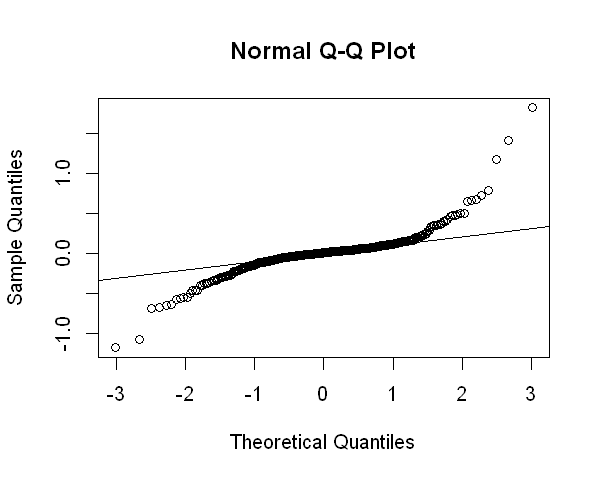

In [0]:
# test for residual's normality
options(repr.plot.width=5, repr.plot.height=4)
qqnorm(index_fit$residuals)
qqline(index_fit$residuals) 

In [0]:
# test if residuals are white noise:
Box.test(index_fit$residuals)

# test for independence of residuals
Box.test(index_fit$residuals,type='Ljung-Box')


	Box-Pierce test

data:  index_fit$residuals
X-squared = 0.59735, df = 1, p-value = 0.4396



	Box-Ljung test

data:  index_fit$residuals
X-squared = 0.60189, df = 1, p-value = 0.4379


p-value = 0.4396 > 0.05，we accept the null hypothesis of white noise errors.     

p-value = 0.4379 > 0.05, we accept the null hypothesis of independent residuals.   

As a result, ARIMA(2,2,2) model fits this time series successfully.

Now, we shall conduct an in-sample forecast - we shall split train and test sets on a 80/20 split ratio.<br>
Train set: 1987 - 2012<br>
Test set: 2013 - 2020

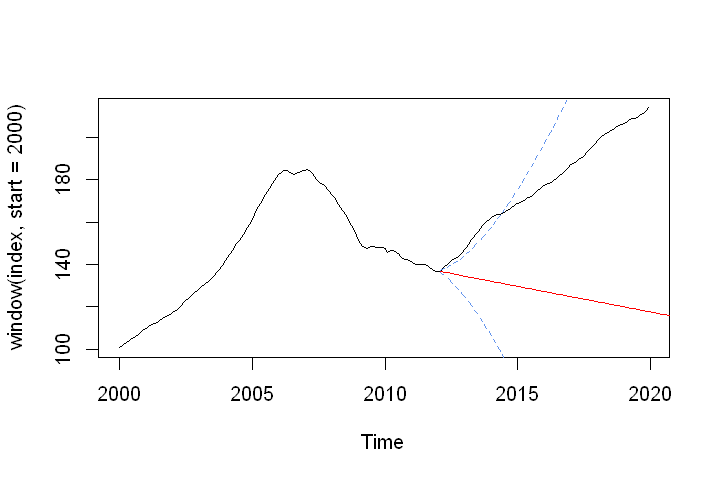

In [0]:
index_fit <- arima(window(index,start=1987,end=2012),
                   order = c(2,2,2))

index_forecast <- predict(index_fit,n.ahead=120,se.fit=TRUE)

# plot the predicted values along with our uncertainty about those forecasts
options(repr.plot.width=6, repr.plot.height=4)
plot(window(index,start=2000))
     
lines(index_forecast$pred,col="red")
     
lines(index_forecast$pred+2*index_forecast$se, col="cornflowerblue", lty= "dashed")
     
lines(index_forecast$pred-2*index_forecast$se, col="cornflowerblue", lty= "dashed")